Curso:<br>
https://cursos.alura.com.br/course/data-science-introducao-a-testes-estatisticos-com-python<br>
<br>
Datasets:<br>
https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata<br>
https://grouplens.org/datasets/movielens/<br>

In [1]:
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seed = 4242
np.random.seed(seed)

In [3]:
workspace = '~/Workspace/'
folder = workspace + 'alura/data-science/testes-estatisticos-python/'

# Análise TMDB

In [4]:
tmdb_file = folder + 'tmdb_5000_movies.csv.tar.gz'

tmdb = pd.read_csv(tmdb_file)
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


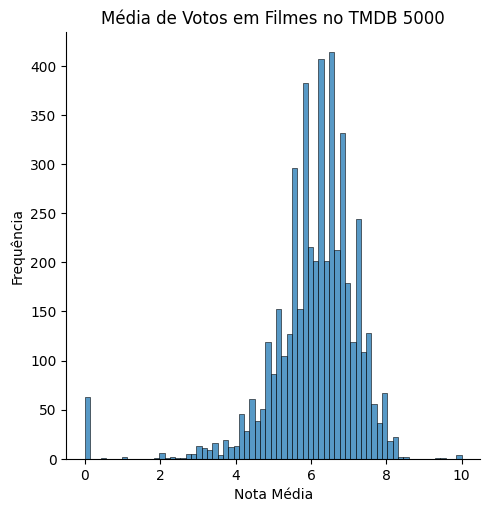

In [6]:
ax = sns.displot(tmdb.vote_average)
ax.set(xlabel='Nota Média', ylabel='Frequência',
      title='Média de Votos em Filmes no TMDB 5000')

[Text(0.5, 0, 'Nota Média'),
 Text(0.5, 1.0, 'Média de Votos em Filmes no TMDB 5000')]

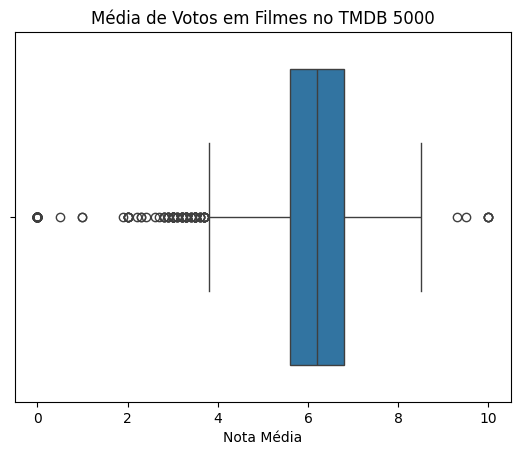

In [7]:
ax = sns.boxplot(x=tmdb.vote_average)
ax.set(xlabel='Nota Média', title='Média de Votos em Filmes no TMDB 5000')

Verificando filmes com média 0 ou 10
(possíveis dados estranhos)

In [8]:
tmdb.query('vote_average == 0').head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


In [9]:
tmdb.query('vote_average == 10').head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


Verificou-se filmes com poucos, ou até mesmo nenhum
voto.
Optou-se por filtrar filmes com pelo menos 10 votos.

In [10]:
tmdb_mais_10_votos = tmdb.query('vote_count >= 10')
tmdb_mais_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


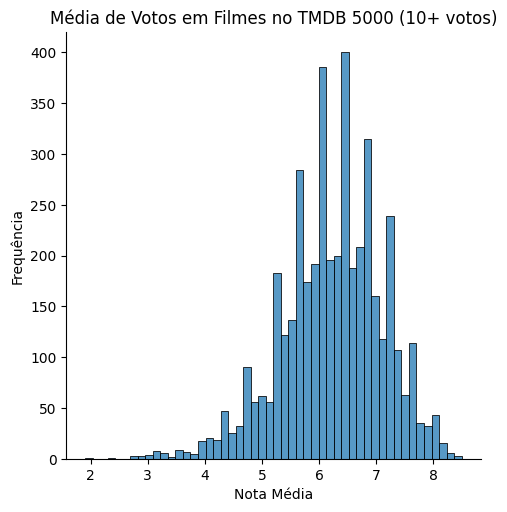

In [11]:
ax = sns.displot(tmdb_mais_10_votos.vote_average)
ax.set(xlabel='Nota Média', ylabel='Frequência',
      title='Média de Votos em Filmes no TMDB 5000 (10+ votos)')

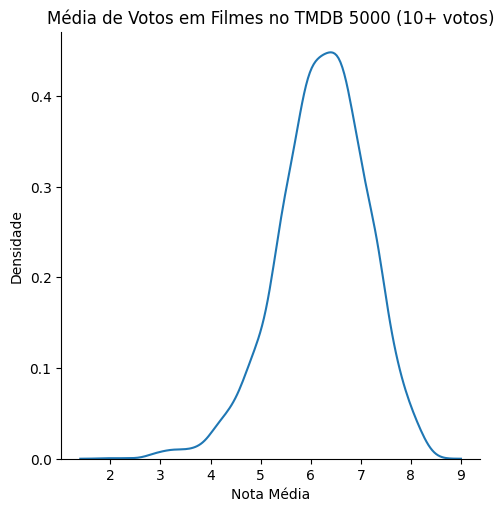

In [12]:
ax = sns.displot(tmdb_mais_10_votos.vote_average, kind='kde')
ax.set(xlabel='Nota Média', ylabel='Densidade',
      title='Média de Votos em Filmes no TMDB 5000 (10+ votos)')

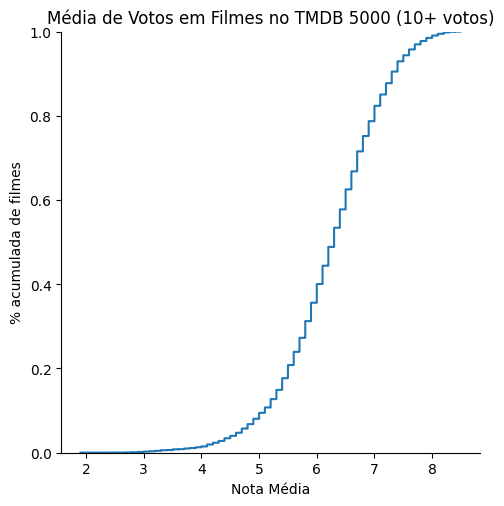

In [13]:
ax = sns.displot(tmdb_mais_10_votos.vote_average, kind='ecdf')
ax.set(xlabel='Nota Média', ylabel='% acumulada de filmes',
      title='Média de Votos em Filmes no TMDB 5000 (10+ votos)')

[Text(0.5, 0, 'Nota Média'),
 Text(0.5, 1.0, 'Média de Votos em Filmes no TMDB 5000 (10+ votos)')]

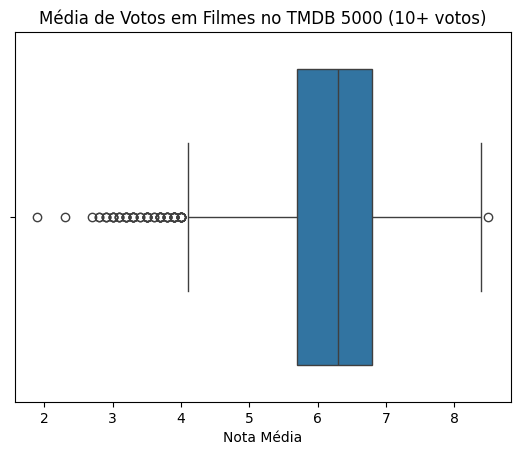

In [14]:
ax = sns.boxplot(x=tmdb_mais_10_votos.vote_average)
ax.set(xlabel='Nota Média',
      title='Média de Votos em Filmes no TMDB 5000 (10+ votos)')

# Análise MovieLens

In [15]:
ratings_file = folder + 'ratings.csv.tar.gz'

notas = pd.read_csv(ratings_file)
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
nota_media_por_filme = notas.groupby('movieId').mean()['rating']
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

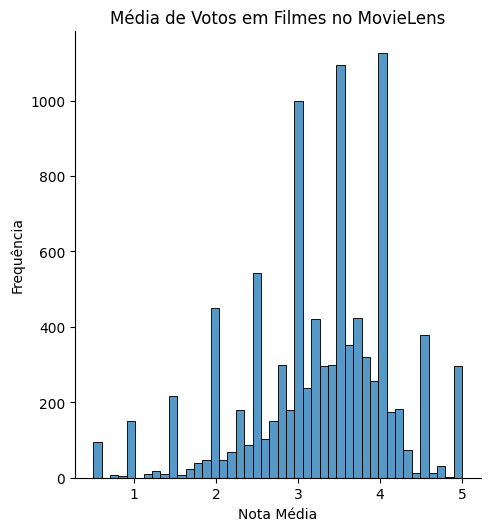

In [17]:
ax = sns.displot(nota_media_por_filme.values)
ax.set(xlabel='Nota Média', ylabel='Frequência',
      title='Média de Votos em Filmes no MovieLens')

In [18]:
qtd_votos_por_filme = notas.groupby('movieId').count()
filmes_mais_10_votos = qtd_votos_por_filme.query('rating >= 10').index
nota_media_filmes_mais_10_votos = nota_media_por_filme\
                                    .loc[filmes_mais_10_votos]

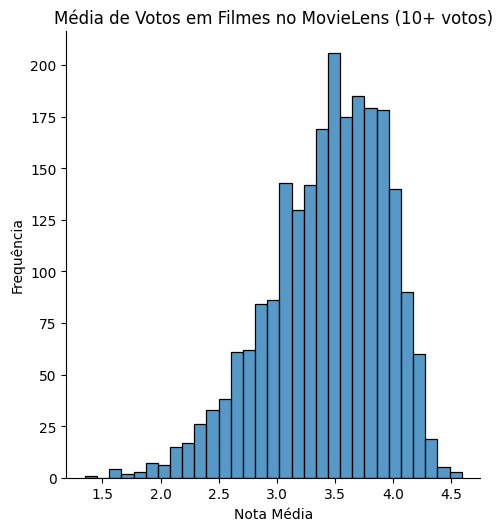

In [19]:
ax = sns.displot(nota_media_filmes_mais_10_votos.values)
ax.set(xlabel='Nota Média', ylabel='Frequência',
      title='Média de Votos em Filmes no MovieLens (10+ votos)')

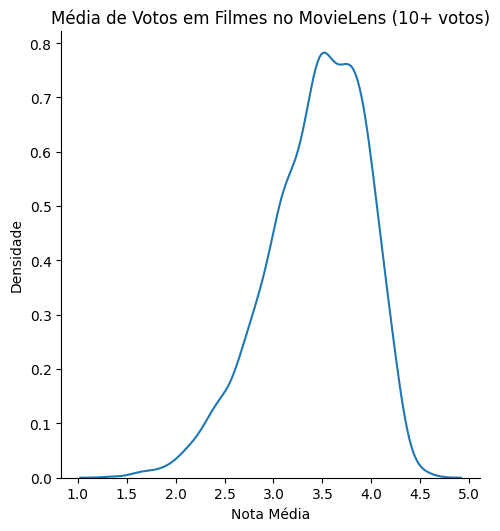

In [20]:
ax = sns.displot(nota_media_filmes_mais_10_votos.values, kind='kde')
ax.set(xlabel='Nota Média', ylabel='Densidade',
      title='Média de Votos em Filmes no MovieLens (10+ votos)')

[Text(0.5, 0, 'Nota Média'),
 Text(0.5, 1.0, 'Média de Votos em Filmes no MovieLens (10+ votos)')]

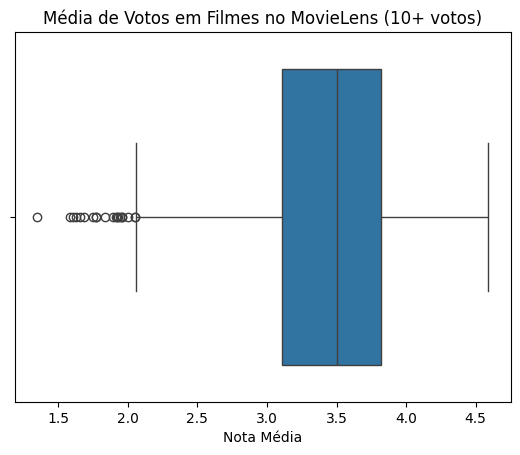

In [21]:
ax = sns.boxplot(x=nota_media_filmes_mais_10_votos.values)
ax.set(xlabel='Nota Média',
      title='Média de Votos em Filmes no MovieLens (10+ votos)')

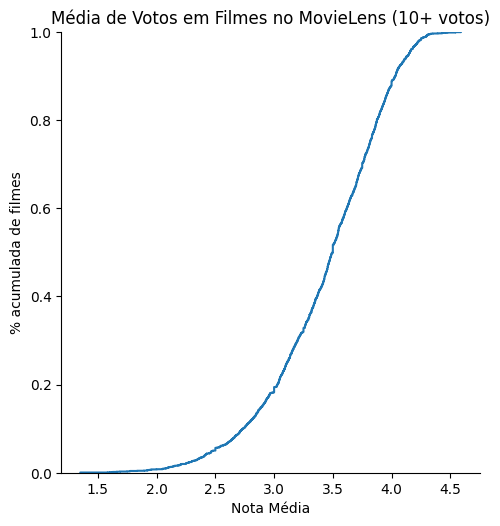

In [22]:
ax = sns.displot(nota_media_filmes_mais_10_votos.values, kind='ecdf')
ax.set(xlabel='Nota Média', ylabel='% acumulada de filmes',
      title='Média de Votos em Filmes no MovieLens (10+ votos)')

# Analisando a distribuição dos dados de outras variáveis do TMDB

In [23]:
tmdb_mais_10_votos.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


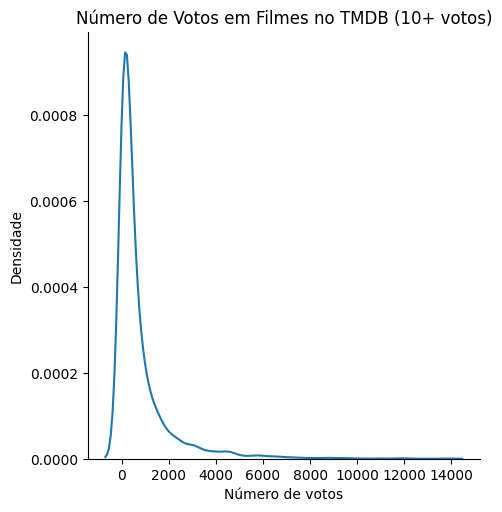

In [24]:
ax = sns.displot(tmdb_mais_10_votos['vote_count'], kind='kde')
ax.set(xlabel='Número de votos', ylabel='Densidade',
      title='Número de Votos em Filmes no TMDB (10+ votos)')

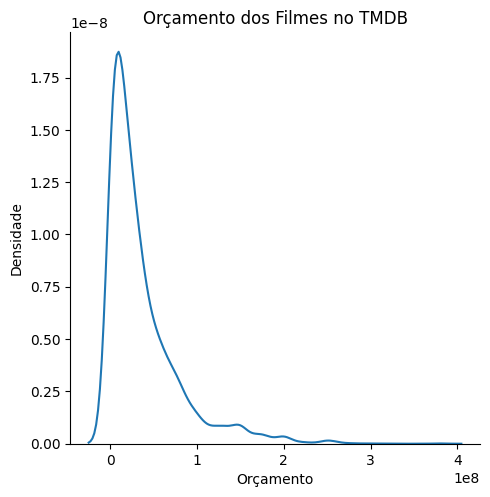

In [25]:
ax = sns.displot(tmdb.query('budget > 0')['budget'], kind='kde')
ax.set(xlabel='Orçamento', ylabel='Densidade',
      title='Orçamento dos Filmes no TMDB')

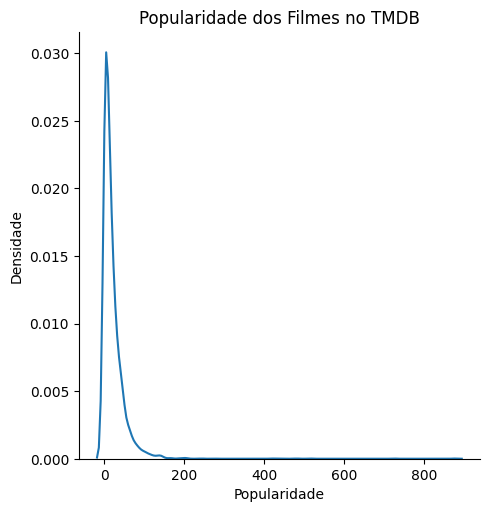

In [26]:
ax = sns.displot(tmdb['popularity'], kind='kde')
ax.set(xlabel='Popularidade', ylabel='Densidade',
      title='Popularidade dos Filmes no TMDB')

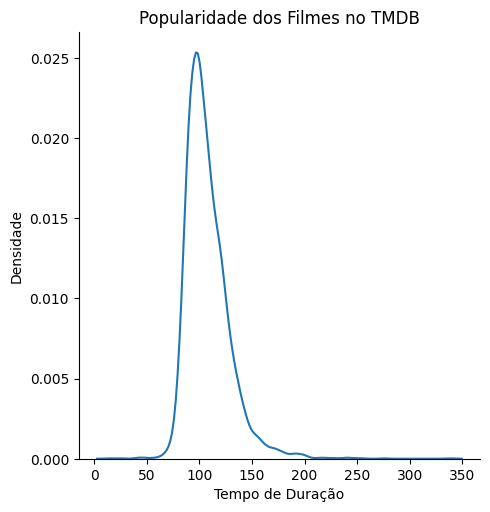

In [27]:
ax = sns.displot(tmdb.query('runtime > 0')['runtime'].dropna(), kind='kde')
ax.set(xlabel='Tempo de Duração', ylabel='Densidade',
      title='Popularidade dos Filmes no TMDB')

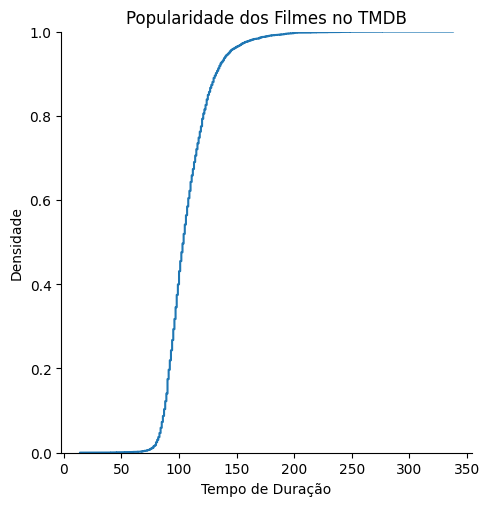

In [28]:
ax = sns.displot(tmdb.query('runtime > 0')['runtime'].dropna(), kind='ecdf')
ax.set(xlabel='Tempo de Duração', ylabel='Densidade',
      title='Popularidade dos Filmes no TMDB')

In [29]:
tmdb.query('runtime > 0')['runtime'].dropna().quantile(0.8)

121.0

# MovieLens: Média dos Filmes 10+ Votos

In [30]:
nota_media_filmes_mais_10_votos.mean()

3.4320503405352594

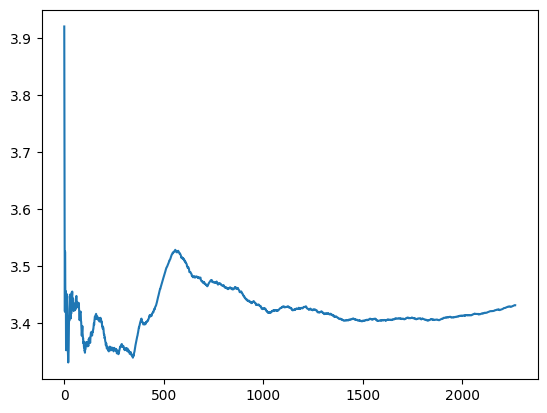

In [31]:
# Variação das médias com aumento de amostras (amostra na ordem do dataset)
plt.plot([nota_media_filmes_mais_10_votos[0:i].mean()
          for i in range(1, len(nota_media_filmes_mais_10_votos))])

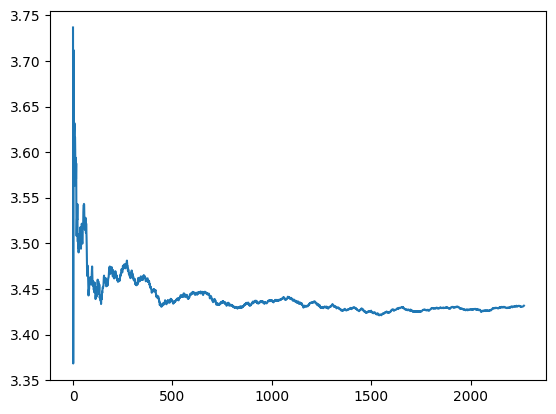

In [32]:
# Variação das médias com aumento de amostras (amostra fora de ordem)
nota_media_sample = nota_media_filmes_mais_10_votos.sample(frac=1)

plt.plot([nota_media_sample[0:i].mean()
          for i in range(1, len(nota_media_sample))])

In [33]:
# Intervalo de confiança - Teste Z
zconfint(nota_media_filmes_mais_10_votos)

(3.4112459477469557, 3.452854733323563)

In [34]:
# Intervalo de confiança - Teste P
DescrStatsW(nota_media_filmes_mais_10_votos).tconfint_mean()

(3.41123483922938, 3.4528658418411386)

# Analisando o filme 1

In [35]:
filmes = pd.read_csv('movies.csv.tar.gz')
filmes.query('movieId == 1')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [36]:
notas_filmeId_1 = notas.query('movieId == 1')
notas_filmeId_1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


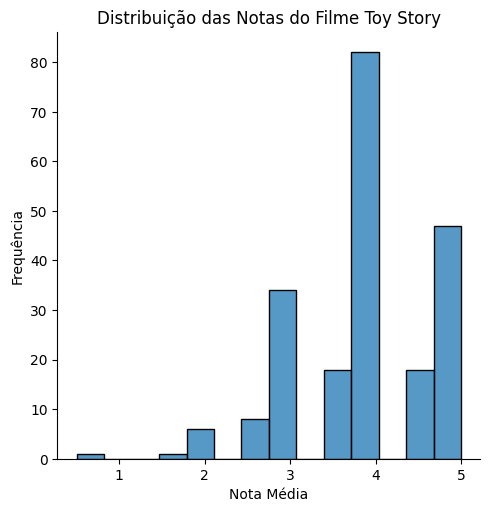

In [37]:
ax = sns.displot(notas_filmeId_1['rating'])
ax.set(xlabel='Nota Média', ylabel='Frequência',
       title='Distribuição das Notas do Filme Toy Story')

[Text(0.5, 0, 'Nota Média'), Text(0.5, 1.0, 'Notas do Filme Toy Story')]

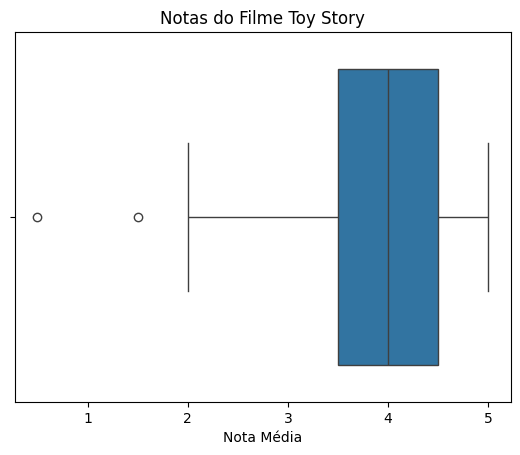

In [38]:
ax = sns.boxplot(x=notas_filmeId_1['rating'])
ax.set(xlabel='Nota Média',
      title='Notas do Filme Toy Story')

In [39]:
# Intervalo de confiança das notas do filme
zconfint(notas_filmeId_1['rating'])

(3.8093359183563402, 4.032524546759939)

In [40]:
# O filme Toy Story tem uma média diferente dos demais filmes
# (p-value < 0.05, rejeitando a hipótese que o Toy Story tem a média igual aos
#  demais filmes)
ztest(notas_filmeId_1['rating'],
      value = nota_media_filmes_mais_10_votos.mean())

(8.586342305916732, 8.978190401885648e-18)

In [41]:
nota_media_filme_1_sample = notas_filmeId_1.sample(frac=1)['rating']

def calcula_teste(i):
    media = nota_media_filme_1_sample[0:i].mean()
    stat, p = ztest(nota_media_filme_1_sample[0:i],
                    value = nota_media_filmes_mais_10_votos.mean())
    return (i, media, p)

teste_medias = np.array([calcula_teste(i)
                         for i in range(2, len(nota_media_filme_1_sample))])

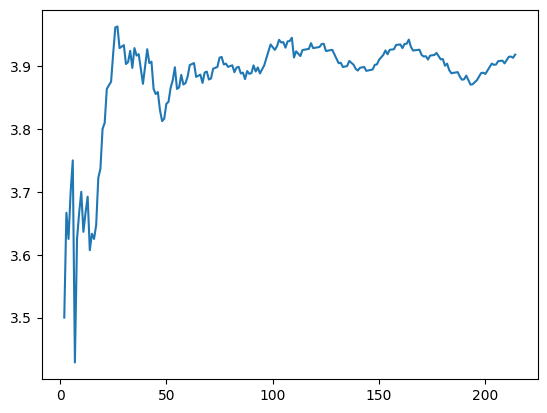

In [42]:
# Variação da média conforme aumentamos a quantidade de amostras
plt.plot(teste_medias[:,0], teste_medias[:,1])

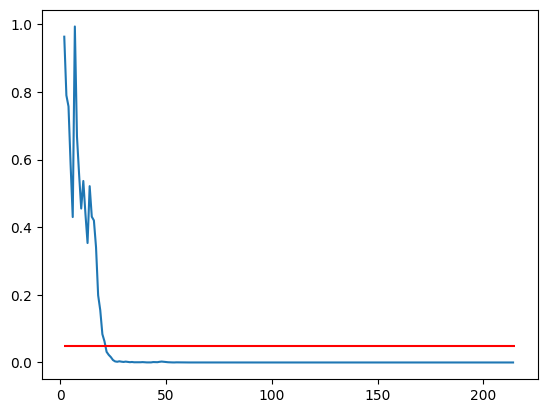

In [43]:
# Variação do p-value conforme aumentamos a quantidade de amostras
# (5% de intervalo de confiança - linha vermelha)
plt.plot(teste_medias[:,0], teste_medias[:,2])
plt.hlines(y = 0.05, xmin = 2, xmax = len(nota_media_filme_1_sample),
           colors = 'r')

# Comparação de duas distribuições

In [44]:
print(ztest(notas_filmeId_1['rating'], notas['rating']))
print(zconfint(notas_filmeId_1['rating'], notas['rating']))

(5.894327101501841, 3.762112778881965e-09)
(0.2799245129192442, 0.5588219849631111)


In [45]:
ttest_ind(notas_filmeId_1['rating'], notas['rating'])

TtestResult(statistic=5.894327101501841, pvalue=3.774003138720876e-09, df=101049.0)

In [46]:
DescrStatsW(notas['rating'])\
.get_compare(DescrStatsW(notas_filmeId_1['rating']))\
.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


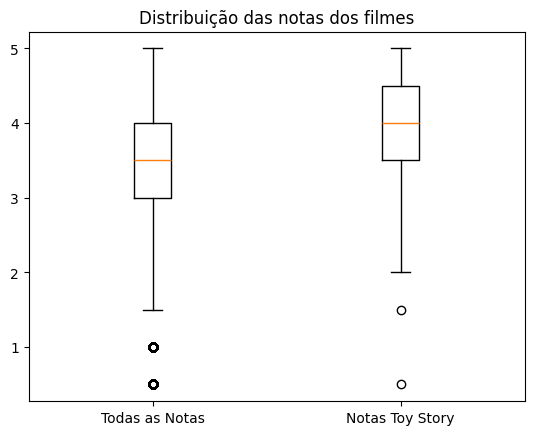

In [47]:
_ = plt.boxplot([notas['rating'],
                 notas_filmeId_1['rating']],
                labels = ['Todas as Notas', 'Notas Toy Story'])
_ = plt.title('Distribuição das notas dos filmes')

## Selecionando apenas um subconjunto das notas do Toy Story

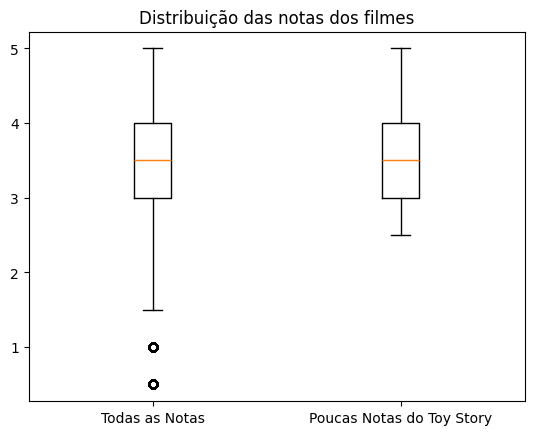

In [48]:
_ = plt.boxplot([notas['rating'],
                 notas_filmeId_1['rating'][3:12]],
                labels = ['Todas as Notas', 'Poucas Notas do Toy Story'])
_ = plt.title('Distribuição das notas dos filmes')

In [49]:
DescrStatsW(notas['rating'])\
.get_compare(DescrStatsW(notas_filmeId_1['rating'][3:12]))\
.summary(use_t = True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627
